In [1]:
from lionagi import Builder, Session, iModel, types

🔢 Pattern 4: Multi-Level Execution (1→3→6→2→1)


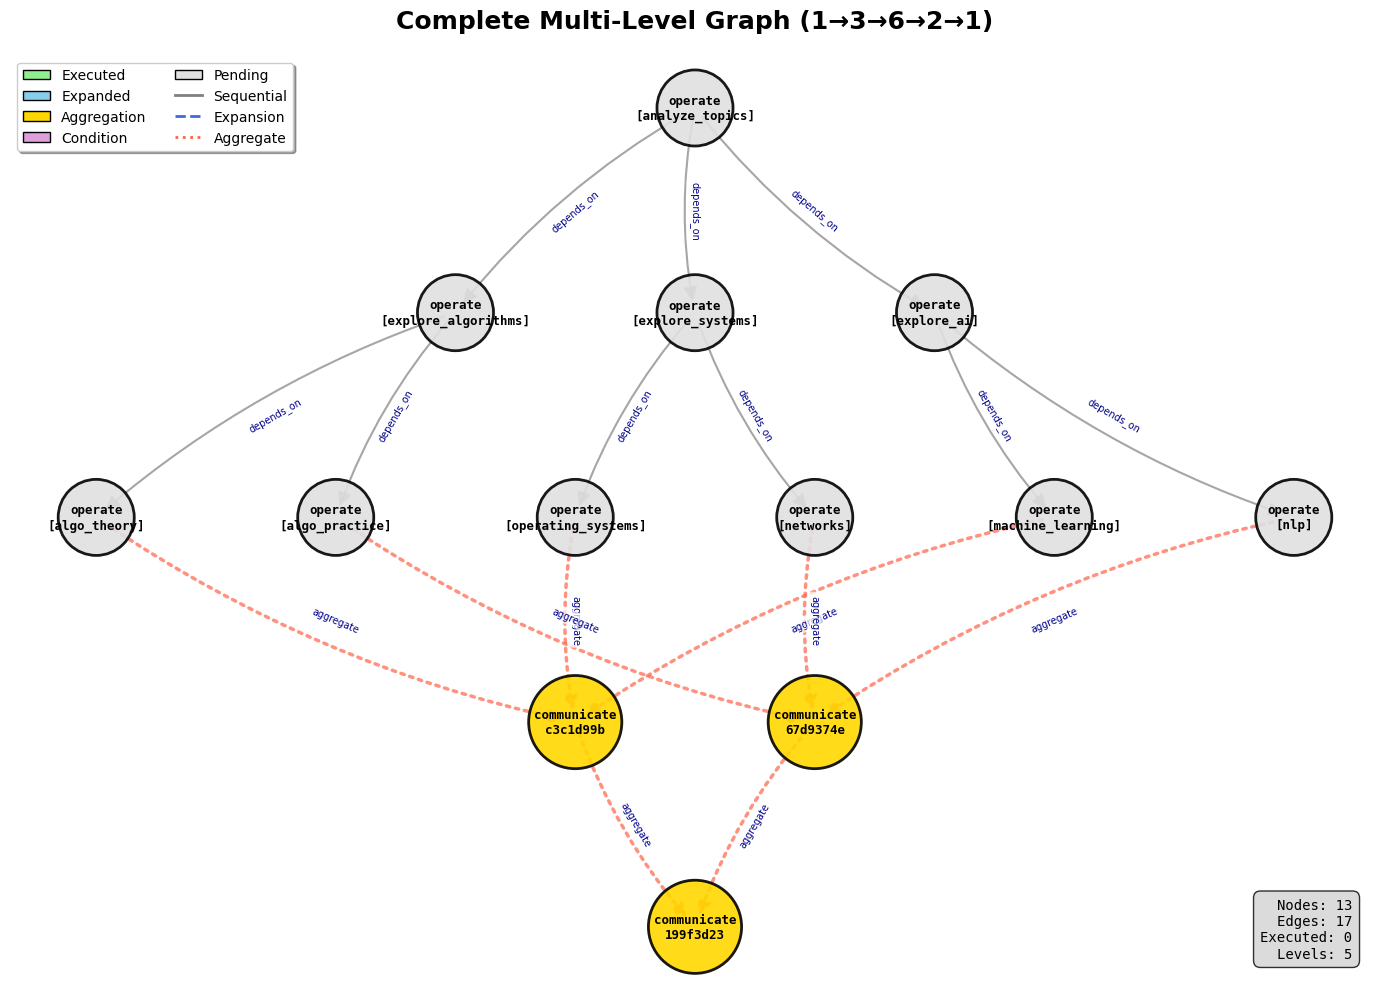


🚀 Executing entire graph with automatic parallelization...
Total nodes to execute: 13
Pre-allocated 12 branches
Executing operation: 6e3262ce
Completed operation: 6e3262ce
Operation aed16b5a waiting for 6e3262ce
Operation 7bd87b6b waiting for 6e3262ce
Operation 5f9dcd56 waiting for 6e3262ce
Executing operation: aed16b5a
Executing operation: 7bd87b6b
Executing operation: 5f9dcd56
Completed operation: 5f9dcd56
Operation 32e5dd52 waiting for 5f9dcd56
Operation 08c3a1dc waiting for 5f9dcd56
Executing operation: 32e5dd52
Executing operation: 08c3a1dc
Completed operation: aed16b5a
Operation 0aa501ff waiting for aed16b5a
Operation fc169a86 waiting for aed16b5a
Executing operation: 0aa501ff
Executing operation: fc169a86
Completed operation: 08c3a1dc
Completed operation: 32e5dd52
Completed operation: 0aa501ff
Aggregation c3c1d99b waiting for 3 sources
Completed operation: 7bd87b6b
Operation 51a48b24 waiting for 7bd87b6b
Operation c7fc910f waiting for 7bd87b6b
Executing operation: 51a48b24
Exec

In [2]:
import time

"""
Pattern 4: Multi-level execution (1→3→6→2→1) using OperationGraphBuilder.
Now with animated GIF visualization!
"""

print("🔢 Pattern 4: Multi-Level Execution (1→3→6→2→1)")
print("=" * 60)

# BUILD THE COMPLETE GRAPH STRUCTURE
builder = Builder("MultiLevel")

# Track execution stages for animation
execution_stages = []

# Level 1: Single root (1 node)
root = builder.add_operation(
    "operate",
    node_id="analyze_topics",
    instruction="Identify 3 major areas of computer science",
    field_models=types.LIST_INSTRUCT_FIELD_MODEL,
)

# Level 2: Three branches (3 nodes) - using operate
branch1 = builder.add_operation(
    "operate",
    node_id="explore_algorithms",
    depends_on=[root],
    instruction="Describe key concepts in algorithms and data structures",
)

branch2 = builder.add_operation(
    "operate",
    node_id="explore_systems",
    depends_on=[root],
    instruction="Describe key concepts in computer systems",
)

branch3 = builder.add_operation(
    "operate",
    node_id="explore_ai",
    depends_on=[root],
    instruction="Describe key concepts in artificial intelligence",
)

# Level 3: Each branch splits into 2 (6 nodes total) - all using operate
# Branch 1 expansions
b1_theory = builder.add_operation(
    "operate",
    node_id="algo_theory",
    depends_on=[branch1],
    instruction="Explain theoretical complexity analysis",
)
b1_practice = builder.add_operation(
    "operate",
    node_id="algo_practice",
    depends_on=[branch1],
    instruction="Give practical algorithm examples",
)

# Branch 2 expansions
b2_os = builder.add_operation(
    "operate",
    node_id="operating_systems",
    depends_on=[branch2],
    instruction="Explain operating system concepts",
)
b2_networks = builder.add_operation(
    "operate",
    node_id="networks",
    depends_on=[branch2],
    instruction="Explain computer networking concepts",
)

# Branch 3 expansions
b3_ml = builder.add_operation(
    "operate",
    node_id="machine_learning",
    depends_on=[branch3],
    instruction="Explain machine learning fundamentals",
)
b3_nlp = builder.add_operation(
    "operate",
    node_id="nlp",
    depends_on=[branch3],
    instruction="Explain natural language processing",
)

# Level 4: Two aggregation points (2 nodes)
theory_synthesis = builder.add_aggregation(
    "communicate",
    source_node_ids=[b1_theory, b2_os, b3_ml],
    instruction="Synthesize theoretical foundations across all areas",
)

practice_synthesis = builder.add_aggregation(
    "communicate",
    source_node_ids=[b1_practice, b2_networks, b3_nlp],
    instruction="Synthesize practical applications across all areas",
)

# Level 5: Final synthesis (1 node)
final = builder.add_aggregation(
    "communicate",
    source_node_ids=[theory_synthesis, practice_synthesis],
    instruction="Create a comprehensive overview of computer science",
)

builder.visualize("Complete Multi-Level Graph (1→3→6→2→1)")

# EXECUTE THE GRAPH
session = Session()
session.default_branch.chat_model = iModel(model="openai/gpt-4.1-nano")
graph = builder.get_graph()

print("\n🚀 Executing entire graph with automatic parallelization...")
print(f"Total nodes to execute: {len(graph.internal_nodes)}")
start_time = time.time()

# Execute the entire graph once - flow() handles the level-by-level execution automatically
result = await session.flow(
    graph=graph,
    parallel=True,
    max_concurrent=10,
    verbose=True,
)

total_time = time.time() - start_time

print(f"\n✅ Complete execution finished in {total_time:.2f} seconds")

# Now reconstruct the execution stages based on node dependencies
completed_ops = result.get("completed_operations", [])
operation_results = result.get("operation_results", {})

print(f"✅ Executed {len(completed_ops)} operations")

# Mark all as executed
builder.mark_executed(completed_ops)

# Reconstruct execution stages based on graph levels
level1_nodes = [root]
level2_nodes = [branch1, branch2, branch3]
level3_nodes = [b1_theory, b1_practice, b2_os, b2_networks, b3_ml, b3_nlp]
level4_nodes = [theory_synthesis, practice_synthesis]
level5_nodes = [final]

# Create execution stages for animation
execution_stages = [
    ("Level 1: Root Analysis (1 node)", level1_nodes),
    ("Level 2: Three Branches (3 nodes)", level2_nodes),
    ("Level 3: Six Sub-Branches (6 nodes)", level3_nodes),
    ("Level 4: Two Synthesis (2 nodes)", level4_nodes),
    ("Level 5: Final Synthesis (1 node)", level5_nodes),
]

# Show level statistics
print("\n📊 LEVEL STATISTICS:")
for stage_name, nodes in execution_stages:
    print(f"{stage_name}: {len(nodes)} nodes")

# Show some results
print("\n📋 Sample Results:")
for i, (op_id, result_text) in enumerate(operation_results.items()):
    if i >= 3:  # Show first 3
        break
    # Find the node to get its reference_id
    node = None
    for n in graph.internal_nodes.values():
        if n.id == op_id:
            node = n
            break

    if node:
        ref = node.metadata.get("reference_id", str(op_id)[:8])
        print(f"\n[{ref}]: {str(result_text)[:200]}...")

# Show final synthesis result
if final in operation_results:
    print("\n🎯 FINAL SYNTHESIS:")
    print("=" * 60)
    print(f"{operation_results[final]}")
    print("=" * 60)

In [3]:
import json

In [4]:
g = builder.get_graph()
d_ = g.to_dict()

str_ = json.dumps(d_, indent=2, ensure_ascii=False)